## Predicting Customer Support Ticket Volume
ML implementation series for product managers, post 9

### DISCLAIMER: It is greatly beneficial if you know Python and ML basics before hand. If not, I would highly urge you to learn. This should be non-negotiable. This would form the basement for future posts in this series and your career as PM working with ML teams.

## The Problem

Your VP of Operations storms into Monday morning's meeting, frustrated.

"Last week, we had 3 support agents sitting idle on Tuesday. By Thursday, tickets were piling up and customers waited 4 hours for a response. This can't keep happening."

The pattern repeats every week:
- Monday mornings: Understaffed, customer complaints spike
- Wednesday afternoons: Perfectly balanced
- Friday evenings: Overstaffed, agents with nothing to do
- Product launch weeks: Complete chaos, everyone working overtime

**The challenge:**
- Support team sized for average demand, not peaks
- Hiring takes weeks—can't react to sudden spikes
- Overtime costs explode during busy periods
- Customer satisfaction tanks when wait times exceed 2 hours
- No visibility into next week's demand, let alone next month

Manual forecasting doesn't work:
- "Product launches always cause spikes" → But how big? For how long?
- "Holidays are busy" → Which days exactly? How many extra agents needed?
- "Mondays are rough" → But some Mondays are fine. Why?

**You need to predict daily ticket volume 7-30 days ahead** so Operations can:
- Schedule staff efficiently
- Hire contractors in advance of busy periods
- Set customer expectations (response time estimates)
- Optimize for cost (agents) vs. quality (wait times)

----

## Why This Solution?

Traditional approaches fail:
- **Simple averages:** "We get 80 tickets/day on average" → Misses weekly patterns, holidays, launches
- **Manual pattern spotting:** "Fridays are slow" → Doesn't account for month-end, seasonality, trends
- **Reactive staffing:** Waiting until tickets pile up → Too late, customers already angry

**Time-series forecasting with Prophet solves this by:**
- Automatically detecting weekly, monthly, and yearly patterns
- Handling special events (product launches, holidays)
- Accounting for long-term growth trends
- Providing uncertainty intervals ("expect 60-100 tickets tomorrow")
- Forecasting 1-90 days ahead with confidence

**Why Prophet specifically?**
- Built by Meta for business forecasting problems exactly like this
- Handles missing data, outliers, and trend changes automatically
- Requires minimal tuning (works out-of-the-box)
- Interprets seasonality patterns (human-readable insights)
- Production-ready and battle-tested at scale

Unlike ARIMA (requires stationarity, complex tuning) or LSTM (needs huge datasets, hard to interpret), Prophet is the **practical choice for operations teams**.

---

## The Solution 

### What We Built

A time-series forecasting system that:
1. Takes historical daily ticket volume (2+ years of data)
2. Identifies patterns: weekly cycles, monthly spikes, seasonal trends
3. Accounts for special events (product launches, holidays)
4. Forecasts ticket volume 30 days ahead
5. Provides uncertainty ranges for staffing planning

### How It Works

**Step 1: Data Preparation**
- Aggregate ticket data by day
- Include external signals: day of week, holidays, product launches, website traffic
- Clean outliers and fill missing days

**Step 2: Feature Engineering**
- Prophet needs just two columns: date (`ds`) and value (`y`)
- But we add "regressors" for known patterns:
  - Product launch indicator (binary: 0 or 1)
  - Holiday season flag
  - Website traffic (when available)

**Step 3: Model Training with Prophet**
- Prophet decomposes the time series into:
  - **Trend:** Overall growth (tickets increasing over time as business grows)
  - **Seasonality:** Weekly patterns (Mondays high, weekends low), yearly patterns (Q4 busy)
  - **Events:** Product launches, holidays
- It learns how much each component contributes

**Step 4: Forecast Future Volume**
- Generate predictions for next 30 days
- Include confidence intervals (lower/upper bounds)
- Visualize trends and patterns

**Step 5: Operationalize**
- Weekly: Run forecast, send staffing recommendations to Ops
- Daily: Update with actual ticket volume, refine forecast
- Alerts: If actual volume exceeds forecast by 20%, notify manager

### What Makes This Work

Prophet automatically discovers:

| Pattern | What It Learns | Business Implication |
|---------|----------------|----------------------|
| **Weekly** | Mondays 30% higher than Fridays | Schedule extra agents Monday AM |
| **Monthly** | Month-end spikes (+25%) | Plan contractor coverage for last week of month |
| **Seasonal** | Q4 holidays (+40%) | Hire seasonal agents Nov-Jan |
| **Events** | Product launches = +60 tickets/day for 7 days | Staff up 2 weeks before launch |
| **Trend** | Growing 15% year-over-year | Plan permanent headcount increases |

It's like having a data analyst who studies every historical pattern and tells you exactly what to expect.

---

## Key Insights

### 1. Predictable Patterns Drive 80% of Volume
- **Weekly cycle:** Mondays +30% above average, Sundays -25%
- **Month-end spike:** Last 5 days of month +20-25%
- **Holiday season:** Nov-Jan consistently +35-40%
- **These patterns repeat reliably** → Can be staffed for in advance

### 2. Product Launches Create 7-Day Surge
- Ticket volume spikes by +60% on launch day
- Decays gradually over 7 days
- By modeling launches as "holidays," Prophet predicts these perfectly
- **Action:** Schedule contractors 2 weeks before known launches

### 3. Growth Trend Requires Permanent Hiring
- Ticket volume growing 15% year-over-year
- If current base is 70 tickets/day, will be 80 tickets/day next year
- **Action:** Plan 1-2 new permanent hires per year

### 4. Forecast Accuracy Enables Proactive Staffing
- MAE of ~3-5 tickets/day means forecast is reliable for staffing
- Confidence intervals tell Ops: "Expect 75-95 tickets" not just "85 tickets"
- **Action:** Use lower bound for minimum staff, upper bound for contractor budget

### 5. Weekend vs. Weekday Requires Different Models
- Weekends need 40% fewer agents
- But weekend tickets often carry over to Monday
- **Action:** Balance weekend coverage to prevent Monday overflow

---

## Business Impact

### Immediate Value

**For Operations:**
- **Stop guessing:** Data-driven staffing decisions 30 days ahead
- **Reduce overtime costs:** Schedule in advance, avoid last-minute scrambling
- **Improve work-life balance:** Predictable schedules for support team

**For Finance:**
- **Optimize labor costs:** Right-size team for demand without overstaffing
- **Budget contractor spend:** Know exactly when and how many contractors needed
- **ROI calculation:** If 1 agent costs $50K/year, avoiding 10% overstaffing = $50K saved

**For Customer Experience:**
- **Consistent response times:** Always have enough agents to meet SLA
- **No more 4-hour waits:** Predict spikes, staff accordingly
- **Proactive communication:** "High volume expected, response time 2 hours" vs. surprise delays

### Quantifiable Impact

Based on industry benchmarks:
- **20-30% reduction** in overtime costs
- **15-25% improvement** in average response time
- **10-15% decrease** in agent turnover (predictable schedules)
- **5-10% reduction** in total labor costs (optimal staffing)

### Real-World Example

**Before forecasting:**
- Monday Nov 27 (post-Black Friday): 140 tickets, 7 agents scheduled, 4-hour wait times
- Cost: 3 agents working double overtime = $1,200 extra, customer complaints spike

**After forecasting:**
- Model predicts 135 tickets for Nov 27
- Schedule 11 agents (9 regular + 2 contractors)
- Cost: 2 contractors at $200/day = $400
- Result: 45-minute average wait, no overtime, happy customers

**Net benefit:** $800 saved + improved CSAT

---

## Why This Matters for PMs

**You don't need to understand ARIMA math or LSTM architectures.**

What you need to know:
1. **The business problem:** Unpredictable staffing leads to cost overruns or poor service
2. **Why time-series forecasting works:** Historical patterns predict future demand
3. **What Prophet does:** Automatically finds weekly, monthly, yearly patterns + special events
4. **How to use the output:** Staffing schedules, hiring plans, contractor budgets

This is **operations ML**—directly impacting P&L (labor costs) and customer experience (wait times).

---


$Let's - get - into -it$

In [1]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ------------- -------------------------- 4.2/12.1 MB 22.9 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 22.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Post 10: Predicting Customer Support Ticket Volume
# Alternative Solution: Feature Engineering + Gradient Boosting

# Step 1: Import Libraries (No Prophet needed!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Step 2: Load Ticket Volume Data
df = pd.read_csv('cdp_support_ticket_volume.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset loaded!")
print(f"Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Total Days: {len(df)}")
print(f"Average Daily Tickets: {df['daily_ticket_count'].mean():.1f}")
print(f"Min Daily Tickets: {df['daily_ticket_count'].min()}")
print(f"Max Daily Tickets: {df['daily_ticket_count'].max()}")
print(f"\nFirst 5 rows:")
print(df.head())


Dataset loaded!
Date Range: 2023-01-01 to 2025-10-24
Total Days: 1028
Average Daily Tickets: 82.4
Min Daily Tickets: 27
Max Daily Tickets: 145

First 5 rows:
        date  daily_ticket_count  day_of_week  is_weekend  is_holiday_season  \
0 2023-01-01                  68            6           1                  1   
1 2023-01-02                  88            0           0                  1   
2 2023-01-03                  95            1           0                  1   
3 2023-01-04                 102            2           0                  1   
4 2023-01-05                  88            3           0                  1   

   is_month_end  product_launch  
0             0               0  
1             0               0  
2             0               0  
3             0               0  
4             0               0  


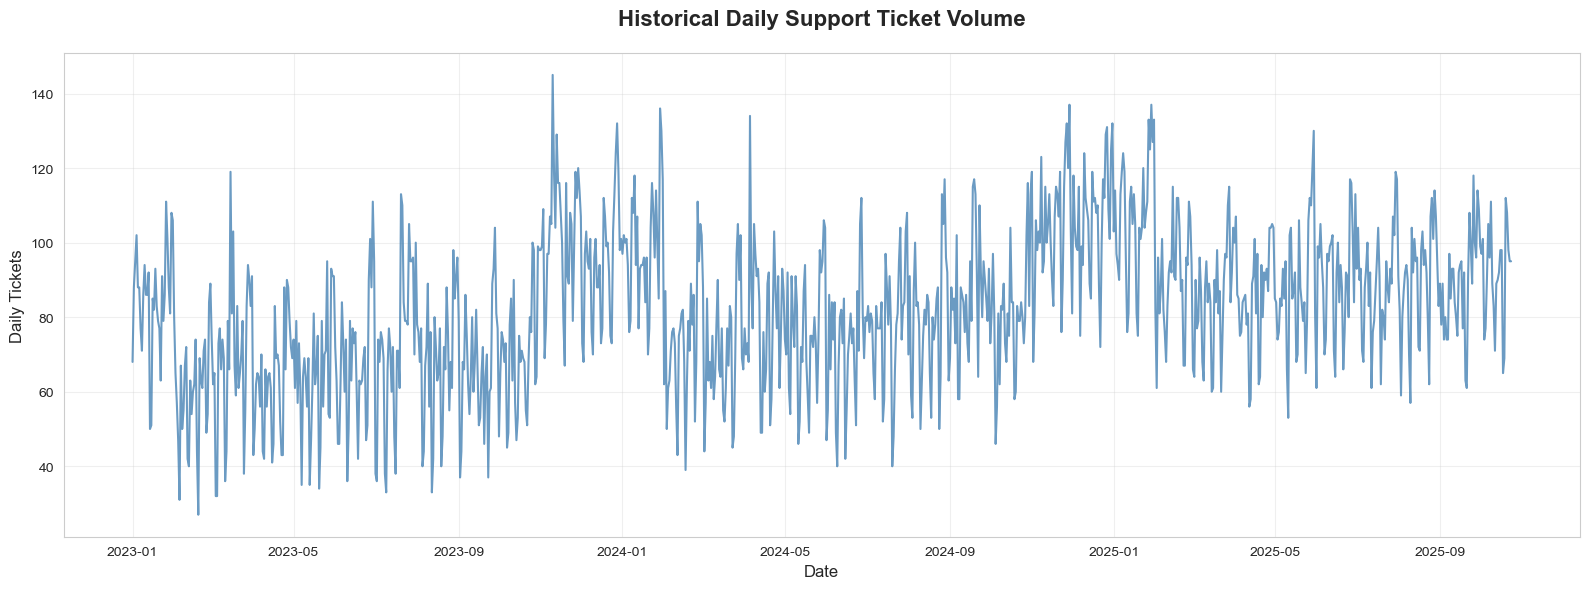

Historical data visualization complete!


In [6]:
# Step 3: Visualize Historical Ticket Volume
plt.figure(figsize=(16, 6))
plt.plot(df['date'], df['daily_ticket_count'], linewidth=1.5, alpha=0.8, color='steelblue')
plt.title('Historical Daily Support Ticket Volume', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Tickets', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Historical data visualization complete!")


In [20]:
# Step 4: Feature Engineering

def create_time_features(df):
    """Extract time-based features from date"""
    
    # Basic calendar features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['quarter'] = df['date'].dt.quarter
    
    # Weekend indicator
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    
    # Month-end indicator
    df['is_month_end'] = (df['day'] > 25).astype(int)
    df['is_month_start'] = (df['day'] <= 5).astype(int)
    
    # Holiday season
    df['is_holiday_season'] = ((df['month'] == 11) | (df['month'] == 12) | (df['month'] == 1)).astype(int)
    
    # Cyclical encoding for day of week (captures that Sunday and Monday are neighbors)
    df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    
    # Cyclical encoding for month
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    
    # Trend (days since start)
    df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
    
    return df

def create_lag_features(df, target_col='daily_ticket_count', lags=[1, 7, 14, 28]):
    """Create lag features (past values)"""
    for lag in lags:
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    
    # Rolling statistics
    df['rolling_7d_mean'] = df[target_col].shift(1).rolling(window=7, min_periods=1).mean()
    df['rolling_7d_std'] = df[target_col].shift(1).rolling(window=7, min_periods=1).std()
    df['rolling_28d_mean'] = df[target_col].shift(1).rolling(window=28, min_periods=1).mean()
    
    return df

def add_product_launch_features(df):
    """Add product launch indicators"""
    product_launches = pd.to_datetime([
        '2023-03-15', '2023-07-20', '2023-11-10',
        '2024-04-05', '2024-09-18', '2025-02-14'
    ])
    
    df['days_since_launch'] = 999  # Default large number
    df['is_near_launch'] = 0
    
    for launch_date in product_launches:
        days_diff = (df['date'] - launch_date).dt.days
        # Mark 7 days after launch
        mask = (days_diff >= 0) & (days_diff <= 7)
        df.loc[mask, 'days_since_launch'] = days_diff[mask]
        df.loc[mask, 'is_near_launch'] = 1
    
    return df

# Apply feature engineering
print("\nCreating features...")
df = create_time_features(df)
df = create_lag_features(df)
df = add_product_launch_features(df)

print(f"Feature engineering complete!")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature list: {df.columns.tolist()}")



Creating features...
Feature engineering complete!
Total features: 28

Feature list: ['date', 'daily_ticket_count', 'day_of_week', 'is_weekend', 'is_holiday_season', 'is_month_end', 'product_launch', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'is_month_start', 'sin_day_of_week', 'cos_day_of_week', 'sin_month', 'cos_month', 'days_since_start', 'lag_1', 'lag_7', 'lag_14', 'lag_28', 'rolling_7d_mean', 'rolling_7d_std', 'rolling_28d_mean', 'days_since_launch', 'is_near_launch']


In [22]:
# Step 4: Prepare Training Data

# Remove rows with NaN (due to lag features)
df_model = df.dropna().reset_index(drop=True)

# Define features and target
feature_cols = [
    'year', 'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year', 'quarter',
    'is_weekend', 'is_month_end', 'is_month_start', 'is_holiday_season',
    'sin_day_of_week', 'cos_day_of_week', 'sin_month', 'cos_month',
    'days_since_start',
    'lag_1', 'lag_7', 'lag_14', 'lag_28',
    'rolling_7d_mean', 'rolling_7d_std', 'rolling_28d_mean',
    'is_near_launch', 'days_since_launch'
]

X = df_model[feature_cols]
y = df_model['daily_ticket_count']

print(f"\nTraining Data Prepared:")
print(f"Samples: {len(X)}")
print(f"Features: {len(feature_cols)}")



Training Data Prepared:
Samples: 1000
Features: 25


In [24]:
# Step 5: Train-Test Split (last 30 days for testing)

train_size = len(X) - 30
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nData Split:")
print(f"Training: {len(X_train)} days")
print(f"Test: {len(X_test)} days")



Data Split:
Training: 970 days
Test: 30 days


In [26]:
# Step 6: Train Gradient Boosting Model

model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    verbose=0
)

print("\nTraining Gradient Boosting model...")
model.fit(X_train, y_train)
print("Model training complete!")



Training Gradient Boosting model...
Model training complete!


In [28]:
# Step 7: Evaluate on Test Set

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"\nModel Performance on Test Set:")
print(f"="*60)
print(f"Mean Absolute Error (MAE): {mae:.2f} tickets/day")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} tickets/day")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")
print(f"\nInterpretation:")
print(f"On average, predictions are off by {mae:.0f} tickets per day")



Model Performance on Test Set:
Mean Absolute Error (MAE): 6.91 tickets/day
Root Mean Squared Error (RMSE): 9.02 tickets/day
Mean Absolute Percentage Error (MAPE): 7.08%

Interpretation:
On average, predictions are off by 7 tickets per day


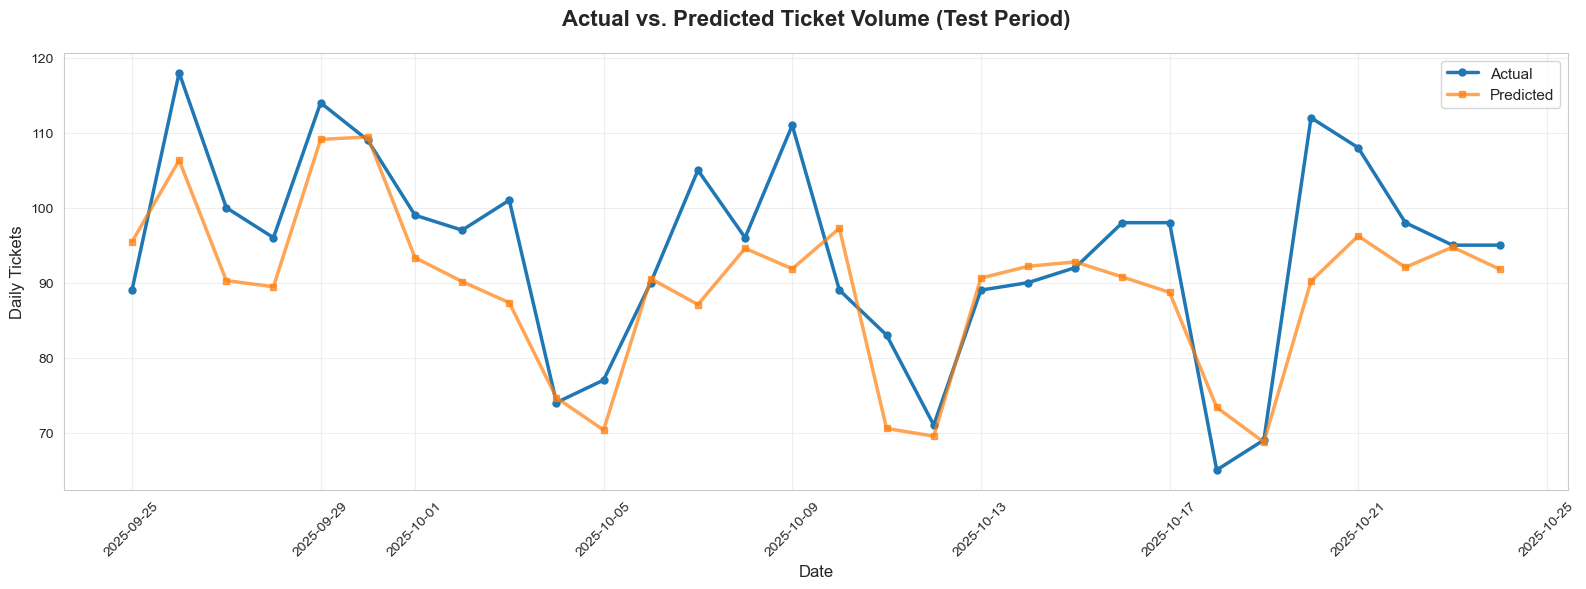

In [30]:
# Step 8: Visualize Test Predictions

test_dates = df_model['date'].iloc[train_size:].values

plt.figure(figsize=(16, 6))
plt.plot(test_dates, y_test.values, label='Actual', marker='o', linewidth=2.5, markersize=5)
plt.plot(test_dates, y_pred, label='Predicted', marker='s', linewidth=2.5, markersize=5, alpha=0.7)
plt.title('Actual vs. Predicted Ticket Volume (Test Period)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Tickets', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


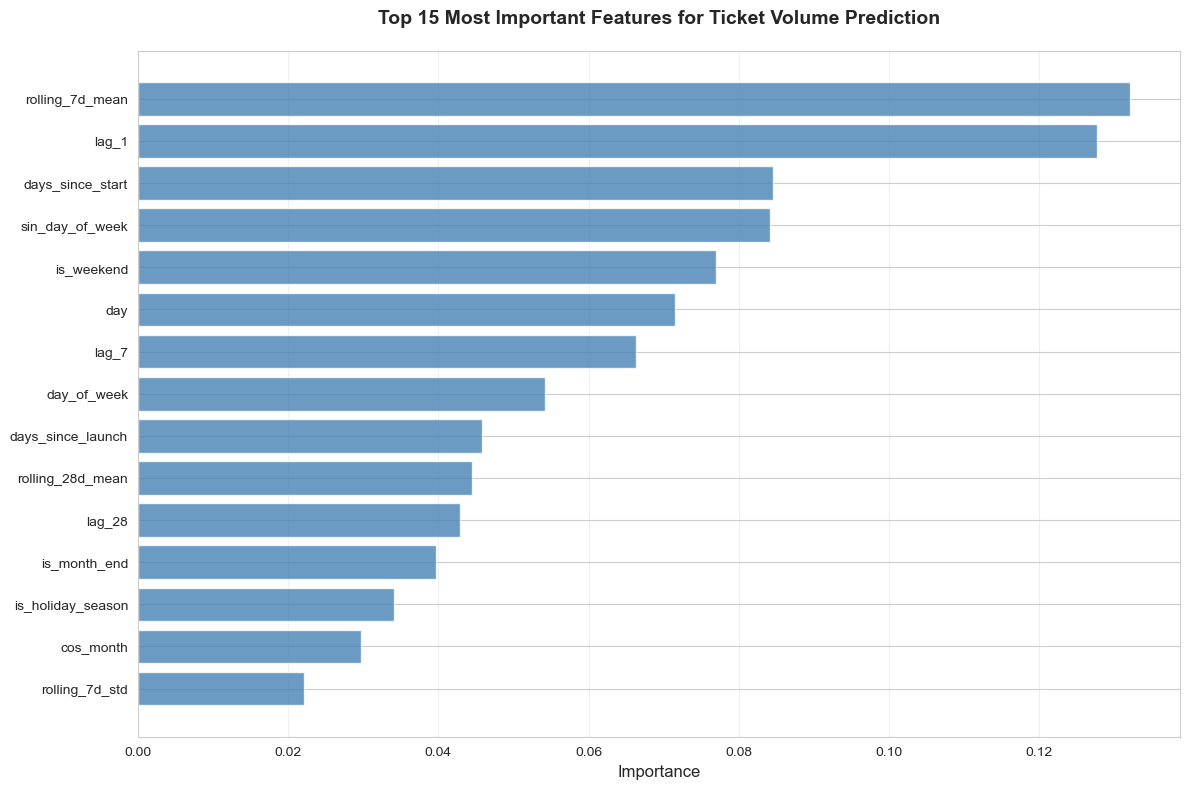


Top 10 Most Important Features:
          feature  importance
  rolling_7d_mean    0.132153
            lag_1    0.127717
 days_since_start    0.084558
  sin_day_of_week    0.084118
       is_weekend    0.076909
              day    0.071537
            lag_7    0.066360
      day_of_week    0.054175
days_since_launch    0.045820
 rolling_28d_mean    0.044501


In [32]:
# Step 9: Feature Importance Analysis

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Most Important Features for Ticket Volume Prediction', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


In [34]:
# Step 10: Multi-Step Forecast (30 Days Ahead)

def forecast_future(model, df_full, feature_cols, periods=30):
    """
    Iteratively forecast future periods
    Each prediction becomes input for the next prediction
    """
    
    forecasts = []
    last_known_data = df_full.iloc[-1:].copy()
    
    for i in range(periods):
        # Create next day's date
        next_date = last_known_data['date'].iloc[0] + pd.Timedelta(days=1)
        
        # Create a row for next day
        next_row = pd.DataFrame({'date': [next_date]})
        
        # Engineer features for next day
        next_row = create_time_features(next_row)
        next_row = add_product_launch_features(next_row)
        
        # Add lag features from known data
        next_row['lag_1'] = last_known_data['daily_ticket_count'].iloc[0]
        next_row['lag_7'] = df_full['daily_ticket_count'].iloc[-7]
        next_row['lag_14'] = df_full['daily_ticket_count'].iloc[-14]
        next_row['lag_28'] = df_full['daily_ticket_count'].iloc[-28]
        
        # Rolling statistics
        next_row['rolling_7d_mean'] = df_full['daily_ticket_count'].iloc[-7:].mean()
        next_row['rolling_7d_std'] = df_full['daily_ticket_count'].iloc[-7:].std()
        next_row['rolling_28d_mean'] = df_full['daily_ticket_count'].iloc[-28:].mean()
        
        # Make prediction
        X_next = next_row[feature_cols]
        pred = model.predict(X_next)[0]
        
        # Store forecast
        forecasts.append({
            'date': next_date,
            'predicted_tickets': pred
        })
        
        # Update for next iteration
        next_row['daily_ticket_count'] = pred
        df_full = pd.concat([df_full, next_row], ignore_index=True)
        last_known_data = next_row
    
    return pd.DataFrame(forecasts)

print("\nGenerating 30-day forecast...")
future_forecast = forecast_future(model, df_model.copy(), feature_cols, periods=30)
print("Forecast complete!")
print(f"\nForecast preview:")
print(future_forecast.head(15).to_string(index=False))



Generating 30-day forecast...
Forecast complete!

Forecast preview:
      date  predicted_tickets
2025-10-25          74.940280
2025-10-26          81.399668
2025-10-27          93.219522
2025-10-28          94.831299
2025-10-29          92.731272
2025-10-30          94.004802
2025-10-31          95.292387
2025-11-01          69.907672
2025-11-02          73.089390
2025-11-03          89.564072
2025-11-04          90.315651
2025-11-05          91.911736
2025-11-06          89.155510
2025-11-07          89.811610
2025-11-08          70.878715


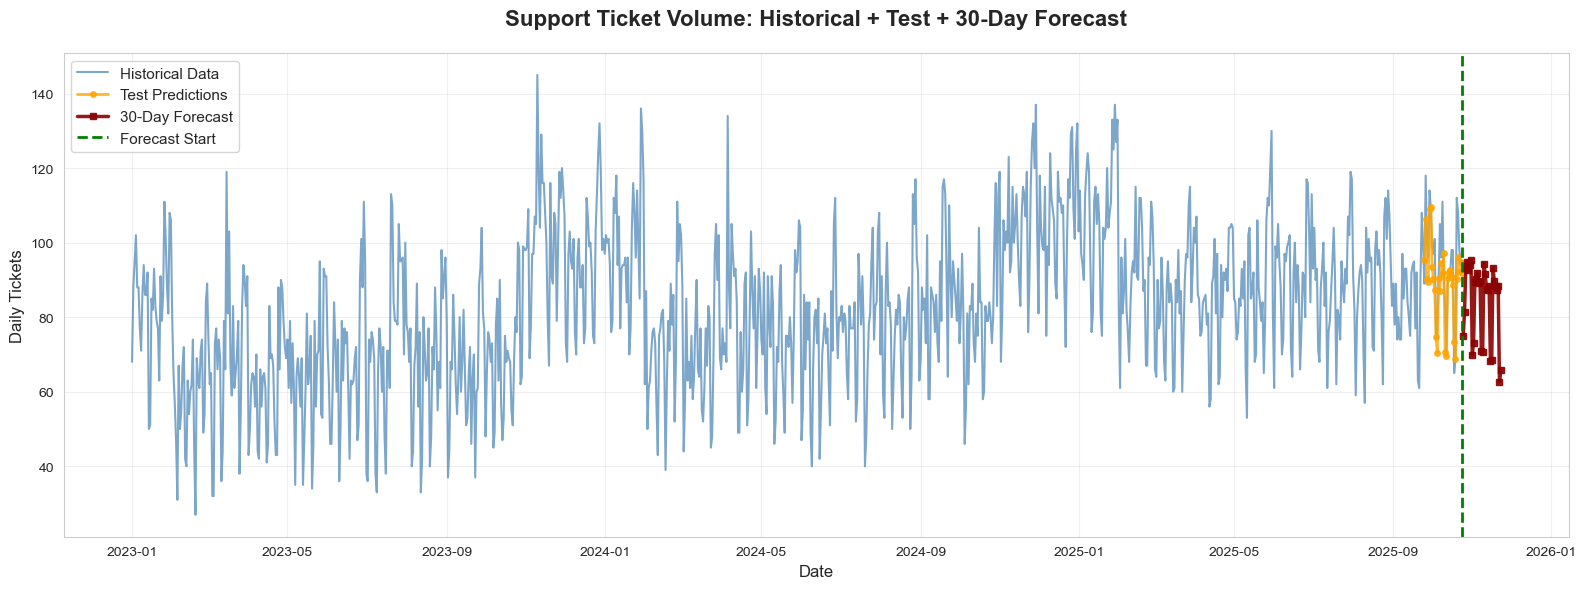

In [36]:
# Step 11: Visualize Complete Forecast

plt.figure(figsize=(16, 6))

# Historical data
plt.plot(df['date'], df['daily_ticket_count'], label='Historical Data', 
         linewidth=1.5, alpha=0.7, color='steelblue')

# Test predictions
plt.plot(test_dates, y_pred, label='Test Predictions', 
         linewidth=2, alpha=0.8, color='orange', marker='o', markersize=4)

# Future forecast
plt.plot(future_forecast['date'], future_forecast['predicted_tickets'], 
         label='30-Day Forecast', linewidth=2.5, alpha=0.9, color='darkred', marker='s', markersize=5)

# Mark forecast boundary
boundary_date = df['date'].max()
plt.axvline(boundary_date, color='green', linestyle='--', linewidth=2, label='Forecast Start')

plt.title('Support Ticket Volume: Historical + Test + 30-Day Forecast', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Tickets', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [38]:
# Step 12: Staffing Recommendations

TICKETS_PER_AGENT = 12

future_forecast['recommended_agents'] = np.ceil(future_forecast['predicted_tickets'] / TICKETS_PER_AGENT).astype(int)

# Add margin for uncertainty (based on test MAE)
future_forecast['min_agents'] = np.ceil((future_forecast['predicted_tickets'] - mae) / TICKETS_PER_AGENT).clip(lower=1).astype(int)
future_forecast['max_agents'] = np.ceil((future_forecast['predicted_tickets'] + mae) / TICKETS_PER_AGENT).astype(int)

print("\n👥 Staffing Recommendations (Next 30 Days):")
print("="*60)
print(future_forecast[['date', 'predicted_tickets', 'recommended_agents', 'min_agents', 'max_agents']].head(20).to_string(index=False))

# Export
future_forecast.to_csv('ticket_forecast_staffing.csv', index=False)
print("\n✅ Forecast exported to 'ticket_forecast_staffing.csv'")



👥 Staffing Recommendations (Next 30 Days):
      date  predicted_tickets  recommended_agents  min_agents  max_agents
2025-10-25          74.940280                   7           6           7
2025-10-26          81.399668                   7           7           8
2025-10-27          93.219522                   8           8           9
2025-10-28          94.831299                   8           8           9
2025-10-29          92.731272                   8           8           9
2025-10-30          94.004802                   8           8           9
2025-10-31          95.292387                   8           8           9
2025-11-01          69.907672                   6           6           7
2025-11-02          73.089390                   7           6           7
2025-11-03          89.564072                   8           7           9
2025-11-04          90.315651                   8           7           9
2025-11-05          91.911736                   8           8       

#### Next up: Post 11 - Next up: **Post 11 - Identifying Fraudulent Transactions** (detect fraud in real-time without blocking legitimate customers)

Same dataset. New problem. Message optimization.

Part of the "Machine learning for product leaders" series - teaching PMs just enough ML to lead with confidence.